In [1]:
#data loading
import pandas as pd
filename="/content/GSSvocab.csv"
a=pd.read_csv(str(filename))

print(a)

        rownames  year  gender nativeBorn ageGroup  educGroup  vocab   age  \
0      1978.1000  1978  female        yes    50-59     12 yrs   10.0  52.0   
1      1978.2000  1978  female        yes      60+    <12 yrs    6.0  74.0   
2      1978.3000  1978    male        yes    30-39    <12 yrs    4.0  35.0   
3      1978.4000  1978  female        yes    50-59     12 yrs    9.0  50.0   
4      1978.5000  1978  female        yes    40-49     12 yrs    6.0  41.0   
...          ...   ...     ...        ...      ...        ...    ...   ...   
28862  2016.2861  2016  female        yes      60+  13-15 yrs    6.0  68.0   
28863  2016.2863  2016  female         no    50-59    >16 yrs    8.0  57.0   
28864  2016.2864  2016    male        yes      60+  13-15 yrs    7.0  77.0   
28865  2016.2865  2016  female        yes      60+  13-15 yrs    9.0  87.0   
28866  2016.2866  2016  female        yes    50-59  13-15 yrs    5.0  55.0   

       educ  
0      12.0  
1       9.0  
2      10.0  
3      

In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
year,0
gender,0
nativeBorn,87
ageGroup,94
educGroup,81
vocab,1348
age,94
educ,81


In [5]:
#Filling null values
stringcolumns={3,4,5}
intColumns={6,7,8}
for x in stringcolumns:
    a[a.columns[x]]=a[a.columns[x]].fillna(a[a.columns[x]].mode()[0])
for y in intColumns:
    a[a.columns[y]]=a[a.columns[y]].fillna(a[a.columns[y]].mean())

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="vocab"

#transform string into int
transformColumns={2,3,4,5}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

        rownames  year  gender  nativeBorn  ageGroup  educGroup  vocab   age  \
0      1978.1000  1978       0           1         3          0   10.0  52.0   
1      1978.2000  1978       0           1         4          3    6.0  74.0   
2      1978.3000  1978       1           1         1          3    4.0  35.0   
3      1978.4000  1978       0           1         3          0    9.0  50.0   
4      1978.5000  1978       0           1         2          0    6.0  41.0   
...          ...   ...     ...         ...       ...        ...    ...   ...   
28862  2016.2861  2016       0           1         4          1    6.0  68.0   
28863  2016.2863  2016       0           0         3          4    8.0  57.0   
28864  2016.2864  2016       1           1         4          1    7.0  77.0   
28865  2016.2865  2016       0           1         4          1    9.0  87.0   
28866  2016.2866  2016       0           1         3          1    5.0  55.0   

       educ  
0      12.0  
1       9.0

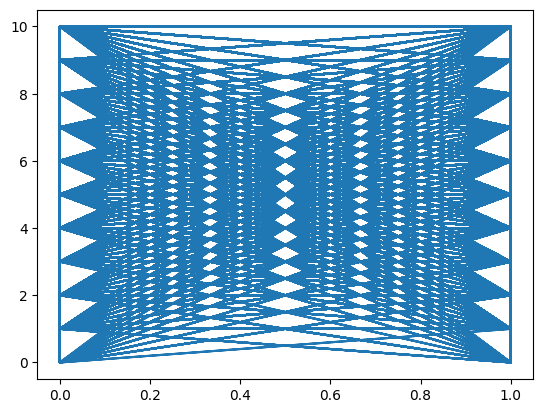

In [8]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 28867 artists>

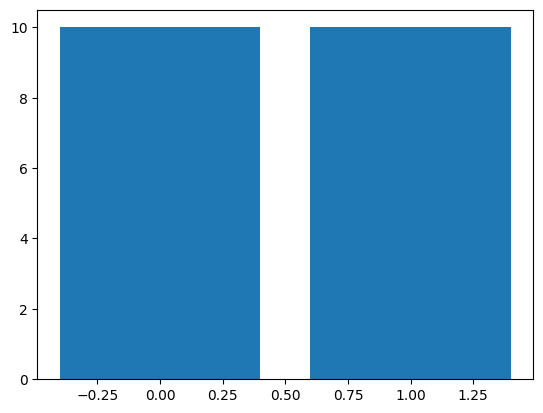

In [9]:
plt.bar(a[a.columns[2]],a[str(target)])

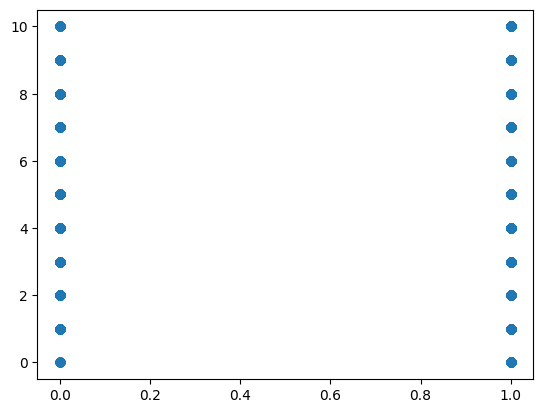

In [10]:
plt.scatter(a[a.columns[3]], a[str(target)])

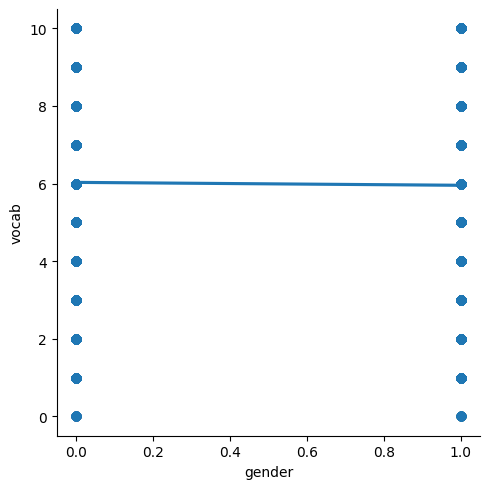

In [12]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="gender",y=str(target),data=a)

<Axes: xlabel='nativeBorn', ylabel='vocab'>

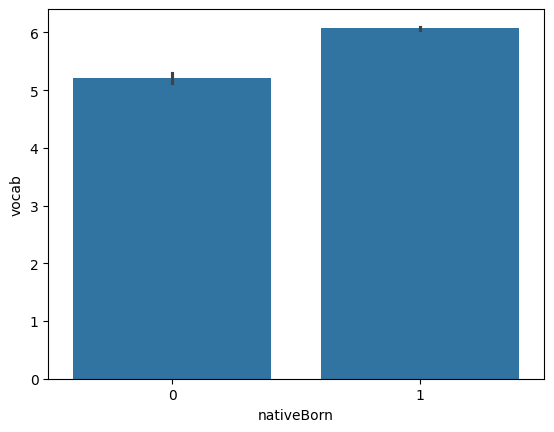

In [13]:
sns.barplot(x=a.columns[3],y=str(target),data=a)

<Axes: xlabel='age', ylabel='vocab'>

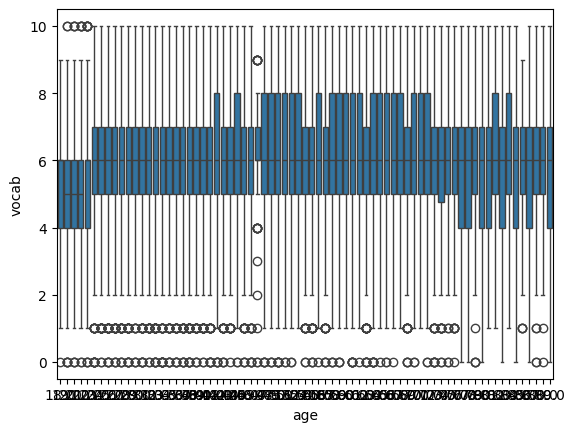

In [14]:
sns.boxplot(x=a.columns[7],y=str(target),data=a)

<ipython-input-15-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='vocab', ylabel='Density'>

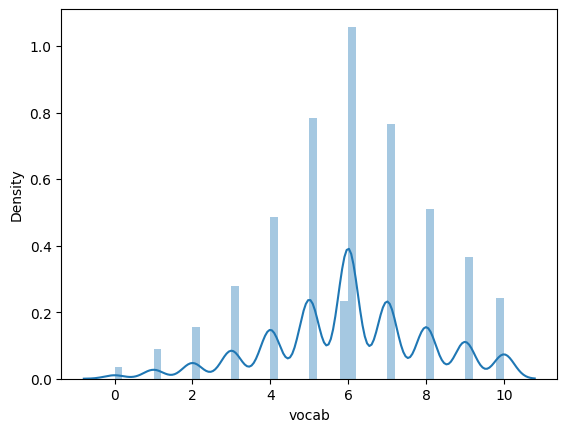

In [15]:
sns.distplot(a[str(target)])

<Axes: xlabel='nativeBorn', ylabel='Density'>

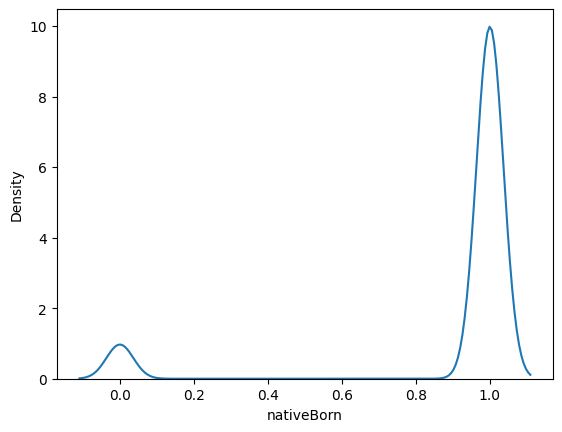

In [16]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='educGroup', ylabel='count'>

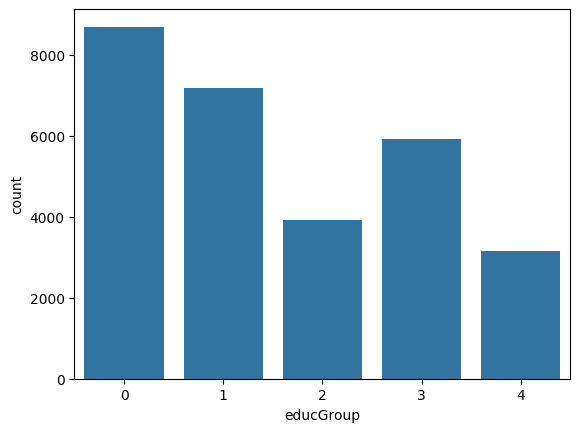

In [17]:
sns.countplot(x=a.columns[5],data=a)

<Axes: >

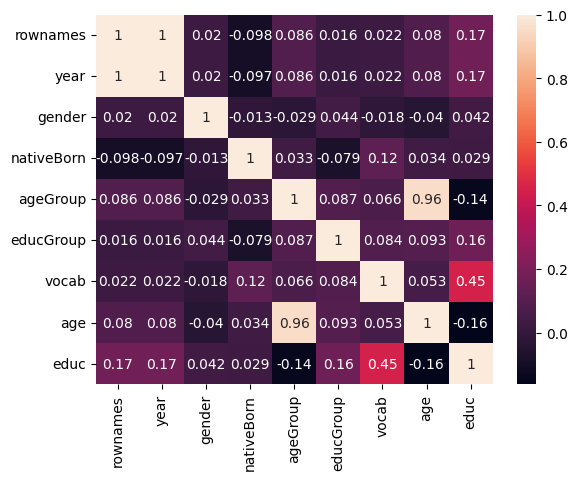

In [18]:
#data=a.select_dtypes(include=np.number).corr()
#Produce heatmap
data=a.corr()
sns.heatmap(data, annot=True)

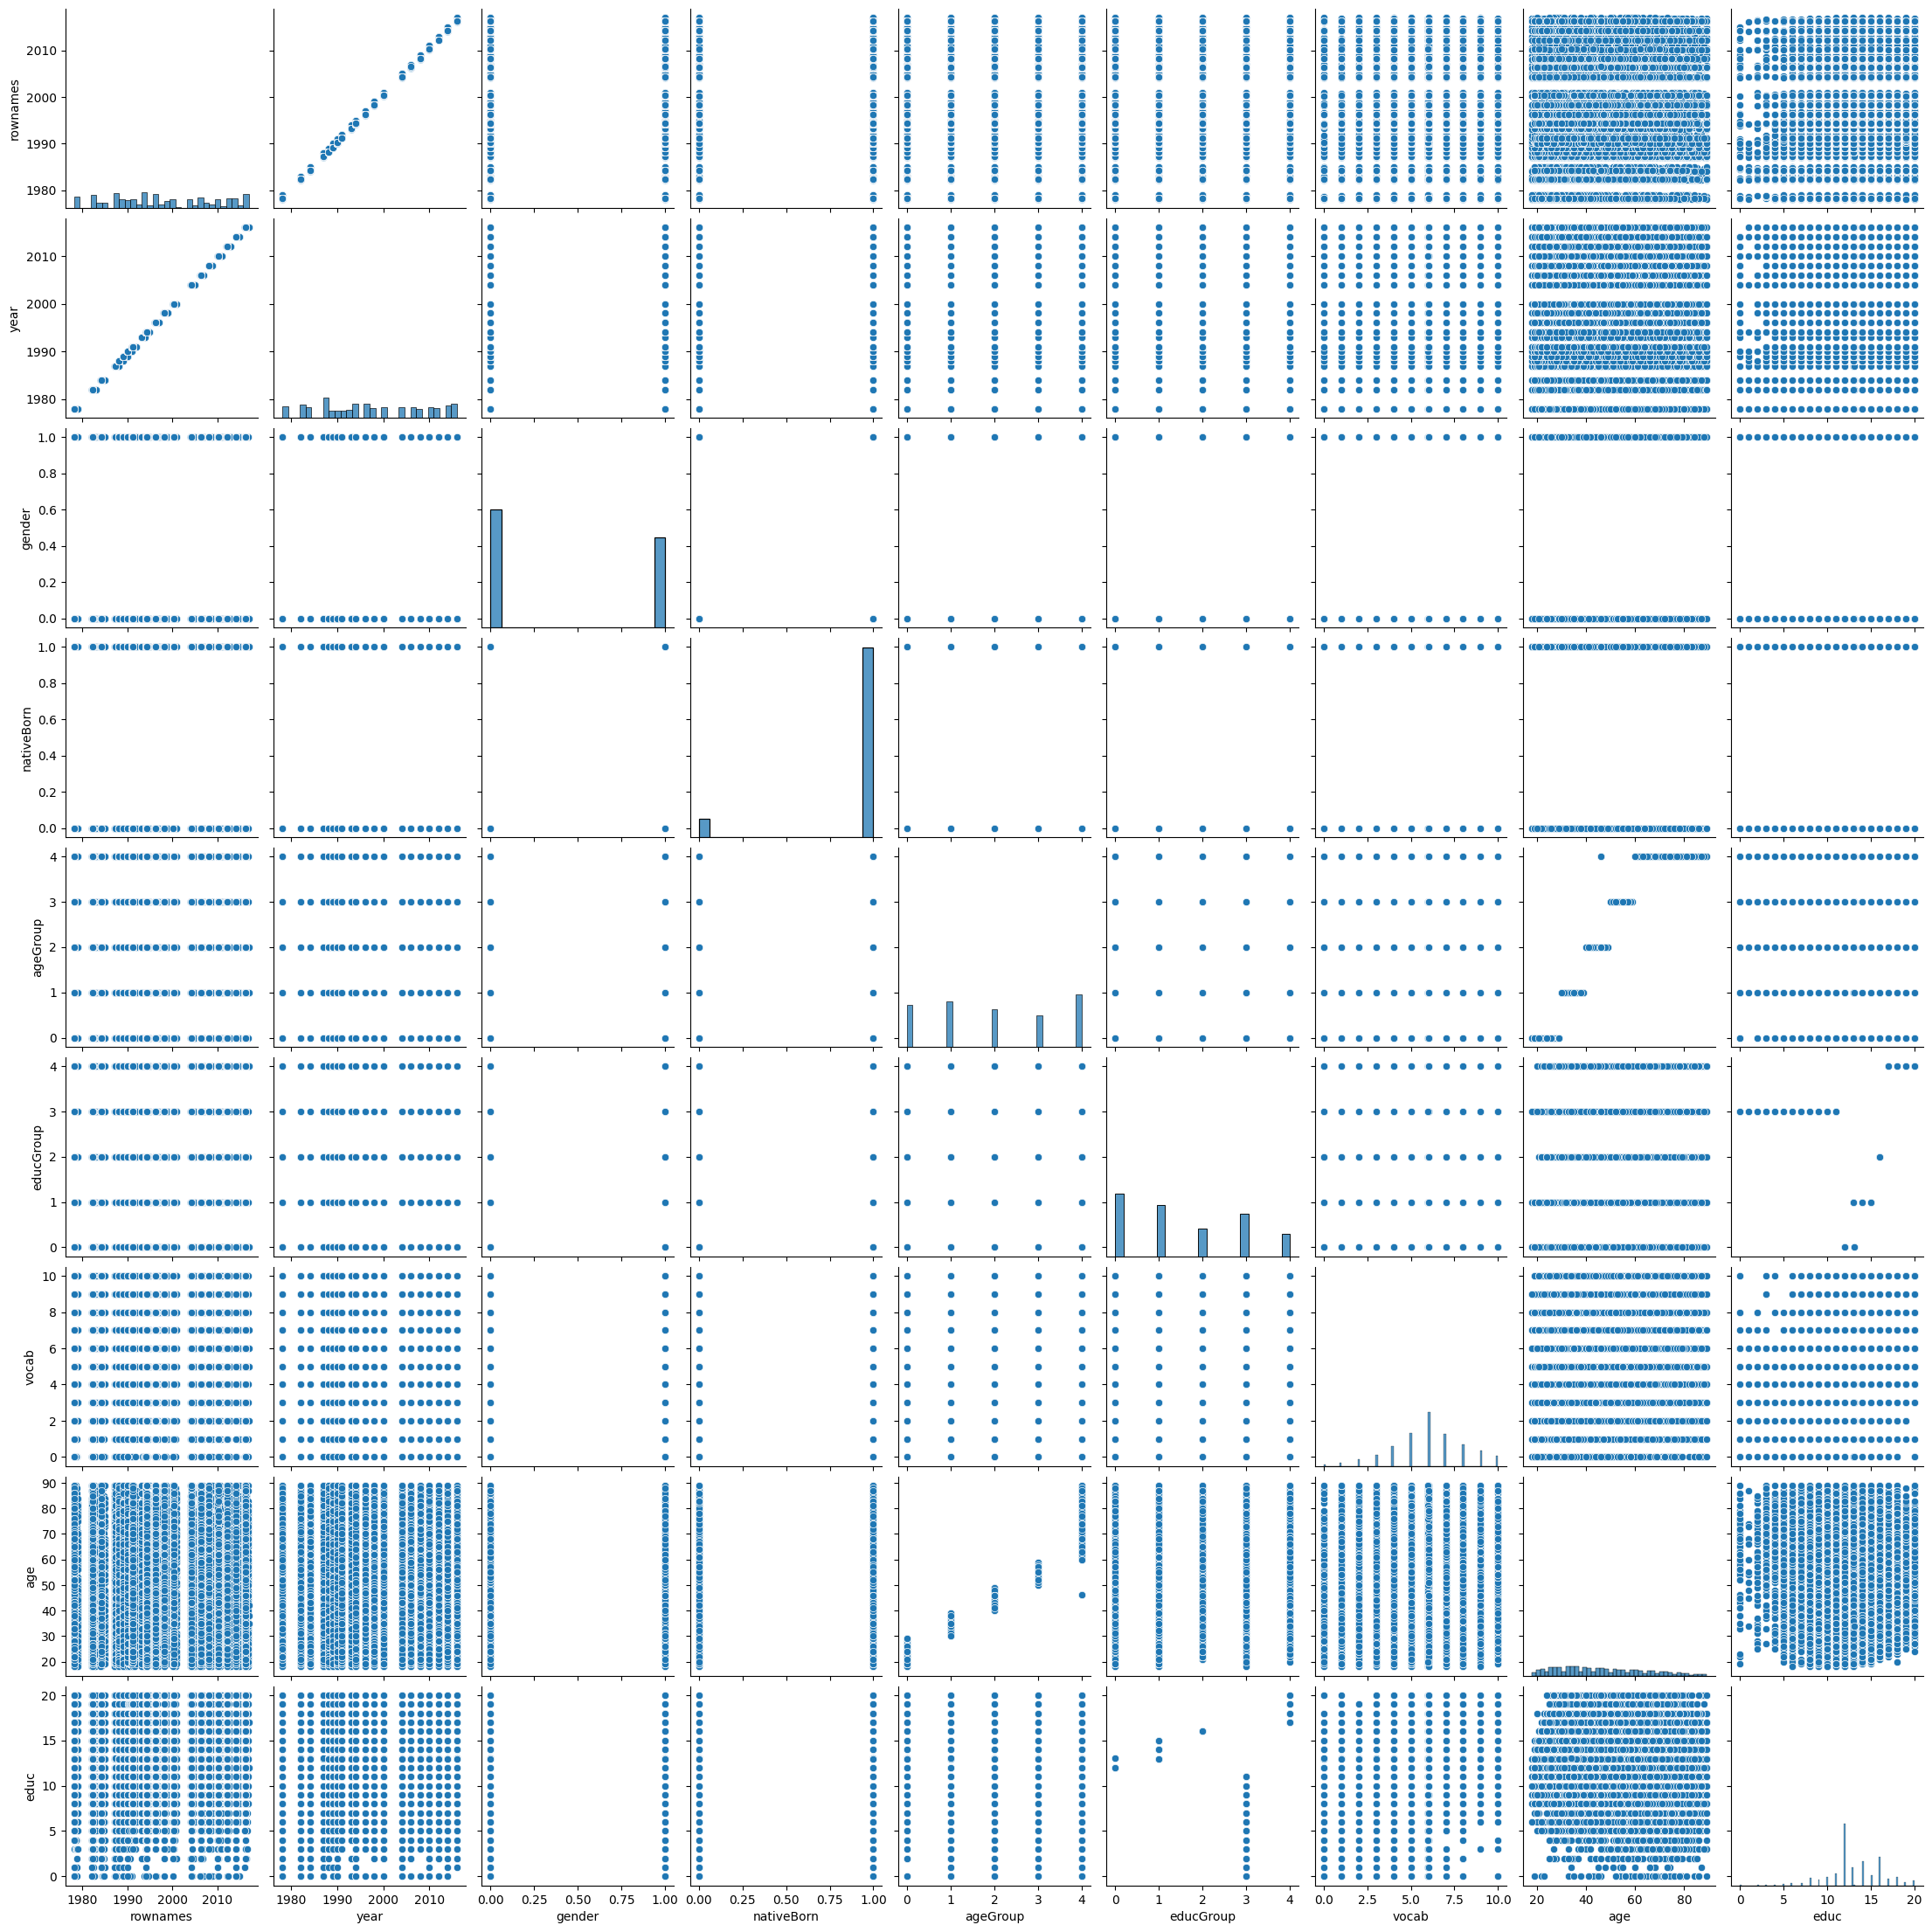

In [19]:
sns.pairplot(data=a)

In [20]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

        rownames  year  gender  nativeBorn  ageGroup  educGroup   age  educ
0      1978.1000  1978       0           1         3          0  52.0  12.0
1      1978.2000  1978       0           1         4          3  74.0   9.0
2      1978.3000  1978       1           1         1          3  35.0  10.0
3      1978.4000  1978       0           1         3          0  50.0  12.0
4      1978.5000  1978       0           1         2          0  41.0  12.0
...          ...   ...     ...         ...       ...        ...   ...   ...
28862  2016.2861  2016       0           1         4          1  68.0  13.0
28863  2016.2863  2016       0           0         3          4  57.0  20.0
28864  2016.2864  2016       1           1         4          1  77.0  15.0
28865  2016.2865  2016       0           1         4          1  87.0  14.0
28866  2016.2866  2016       0           1         3          1  55.0  14.0

[28867 rows x 8 columns]


In [21]:
print(y)

0        10.0
1         6.0
2         4.0
3         9.0
4         6.0
         ... 
28862     6.0
28863     8.0
28864     7.0
28865     9.0
28866     5.0
Name: vocab, Length: 28867, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
print(x_train)

        rownames  year  gender  nativeBorn  ageGroup  educGroup   age  educ
3102   1982.2065  1982       1           1         3          1  56.0  14.0
3844   1984.4530  1984       1           1         0          2  23.0  16.0
12283  1994.8700  1994       0           1         1          1  39.0  14.0
4106   1984.7150  1984       0           1         2          3  49.0  11.0
11366  1993.1103  1993       0           1         1          1  36.0  14.0
...          ...   ...     ...         ...       ...        ...   ...   ...
15811  1998.3470  1998       0           1         3          3  50.0   6.0
22405  2008.1743  2008       0           1         3          1  51.0  14.0
7956   1989.4440  1989       0           1         1          1  37.0  13.0
14418  1996.1089  1996       1           1         2          4  42.0  18.0
23362  2010.1127  2010       1           1         1          2  35.0  16.0

[23093 rows x 8 columns]


In [24]:
print(y_train)

3102      7.000000
3844      6.000000
12283     6.000000
4106      3.000000
11366     7.000000
           ...    
15811     5.998219
22405     9.000000
7956      7.000000
14418    10.000000
23362     5.000000
Name: vocab, Length: 23093, dtype: float64


In [25]:
print(x_test)

        rownames  year  gender  nativeBorn  ageGroup  educGroup   age  educ
10262  1991.9820  1991       1           1         4          1  82.0  13.0
18990  2004.1007  2004       1           0         3          1  51.0  15.0
26115  2014.1257  2014       1           1         4          0  73.0  12.0
25993  2014.1074  2014       0           1         0          4  25.0  18.0
24301  2012.4720  2012       0           1         3          1  54.0  14.0
...          ...   ...     ...         ...       ...        ...   ...   ...
23565  2010.1422  2010       0           1         4          0  69.0  12.0
21389  2006.4500  2006       0           1         2          1  47.0  14.0
4279   1984.8880  1984       1           1         1          1  30.0  13.0
25647  2014.5540  2014       0           0         4          2  77.0  16.0
22607  2010.4900  2010       1           1         2          0  45.0  12.0

[5774 rows x 8 columns]


In [26]:
print(y_test)

10262    5.000000
18990    9.000000
26115    7.000000
25993    8.000000
24301    6.000000
           ...   
23565    7.000000
21389    8.000000
4279     5.000000
25647    3.000000
22607    5.998219
Name: vocab, Length: 5774, dtype: float64


In [27]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [28]:
print(ypred)

[6.45991165 5.98715893 5.81306105 ... 5.94150267 6.60140531 5.50353779]


In [30]:
print(model.predict([[1991.9820,1991,1,1,4,1,82.0,13.0]]))

[6.45991165]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[4. 5. 6. ... 6. 3. 6.]


In [33]:
print(model.predict([[1991.9820,1991,1,1,4,1,82.0,13.0]]))

[6.45991165]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[5.89971511 5.72985755 5.7        ... 5.84       5.29982194 5.17      ]


In [36]:
print(model.predict([[1991.9820,1991,1,1,4,1,82.0,13.0]]))

[6.45991165]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
